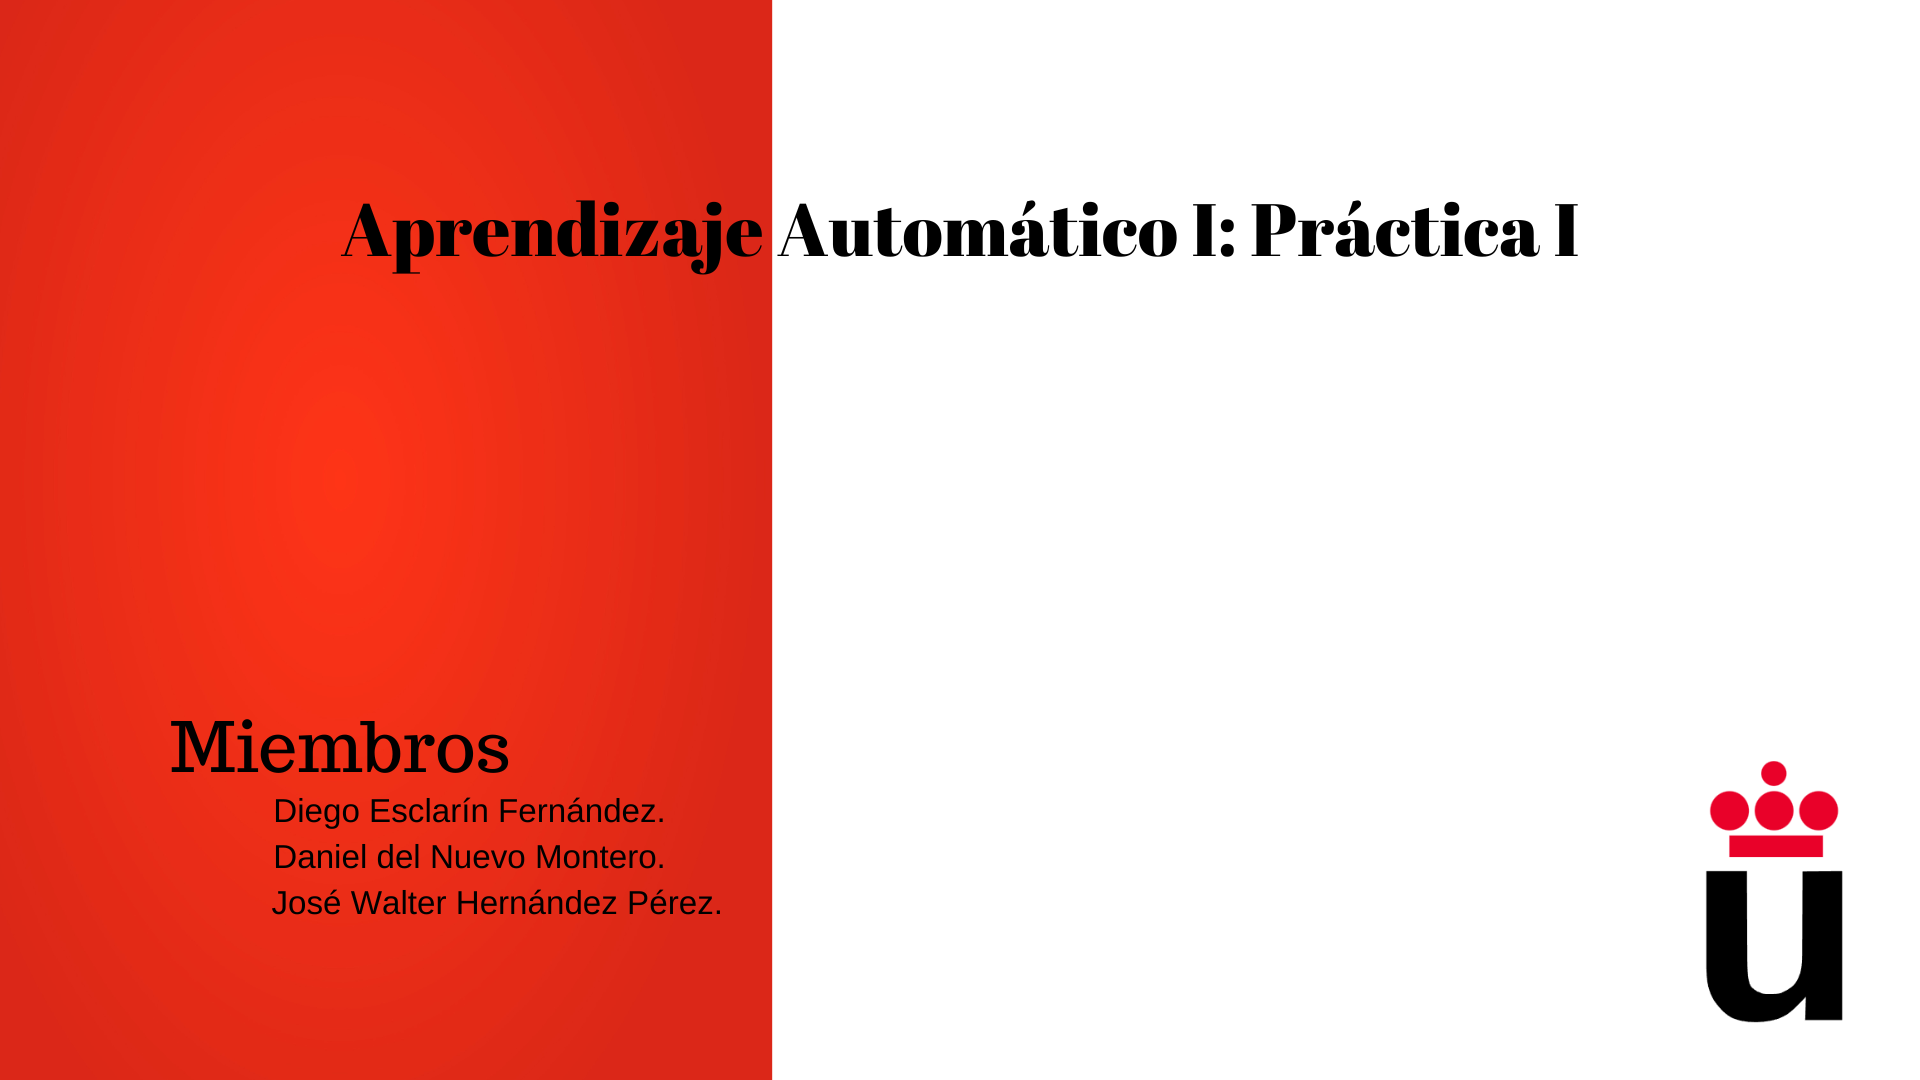

# Introducción:
A lo largo de este cuaderno podrá encontrar:
- En primer lugar, una función que le permitirá introducir la configuración inicial y final que desee. Más allá del propio juego podrá poner como final e inicial cualquiera sin necesidad de estar en formato de torre, aunque recuerde que en ningún caso un disco mayor estará sobre uno de menor tamaño.
- Después, encontrará desglosado en apartados los requerimientos de la propia práctica, así como los algoritmos por separado en su respectivo orden.

### Clase

In [1]:
from queue import PriorityQueue
from collections import deque
import copy
import time
from matplotlib import pyplot as plt

class Hanoi:
    def __init__(self, e_i, e_f):
        self.e_ini = e_i
        self.e_fin = e_f

    def __es_final(self, estado):
        return self.e_fin == estado

    def __expandir_bfs(self, estado):
        vecinos = deque()
        for origen in range(3):
            for destino in range(3):
                if origen != destino and estado[origen] and (
                        not estado[destino] or estado[destino][-1] > estado[origen][-1]):
                    nuevo = copy.deepcopy(estado)
                    nuevo[destino].append(nuevo[origen].pop())
                    vecinos.append(nuevo)
        return vecinos

    def __expandir_dfs(self, estado):
        vecinos = []
        for origen in range(3):
            for destino in range(3):
                if origen != destino and estado[origen] and (
                        not estado[destino] or estado[destino][-1] > estado[origen][-1]):
                    nuevo = copy.deepcopy(estado)
                    nuevo[destino].append(nuevo[origen].pop())
                    vecinos.append(nuevo)
        return vecinos

    def __expandir_heuristica(self, estado, configuracion_objetivo):
        sucesores = []
        for i in range(3):
            for j in range(3):
                if i != j and (estado[i] and (not estado[j] or estado[i][-1] < estado[j][-1])):
                    nuevo_estado = [list(torre) for torre in estado]
                    if nuevo_estado[i]:  # Verificar si la lista no está vacía antes de llamar a pop()
                        nuevo_estado[j].append(nuevo_estado[i].pop())
                        sucesores.append((nuevo_estado, self.__calcular_distancia_hamming(nuevo_estado, configuracion_objetivo)))
        return sucesores

    def __calcular_distancia_hamming(self, estado, configuracion_objetivo):
        distancia_hamming = 0
        for torre_actual, torre_objetivo in zip(estado, configuracion_objetivo):
            for disco_actual, disco_objetivo in zip(torre_actual, torre_objetivo):
                if disco_actual != disco_objetivo:
                    distancia_hamming += 1
        return distancia_hamming

    def bfs(self, e_ini, e_fin):
        t_ini = time.time()
        visitados = []
        q = deque([e_ini])
        nodos_explorados = 0  # Contador de nodos explorados

        while q:
            actual = q.popleft()
            nodos_explorados += 1  # Incrementar el contador de nodos explorados
            if actual not in visitados:
                visitados.append(actual)
                if actual == e_fin:
                    t_fin = time.time()
                    return visitados, t_fin - t_ini, nodos_explorados
                q.extend(vecino for vecino in self.__expandir_bfs(actual) if vecino not in visitados)

        return [], 0, nodos_explorados

    def dfs(self, e_ini, e_fin):
        t_ini = time.time()
        visitados = []
        stack = [e_ini]
        nodos_explorados = 0  # Contador de nodos explorados

        while stack:
            actual = stack.pop()
            nodos_explorados += 1  # Incrementar el contador de nodos explorados
            if actual not in visitados:
                visitados.append(actual)
                if actual == e_fin:
                    t_fin = time.time()
                    return visitados, t_fin - t_ini, nodos_explorados
                vecinos = self.__expandir_dfs(actual)
                stack.extend(vecino for vecino in reversed(vecinos) if vecino not in visitados)

        return [], 0, nodos_explorados

    def heuristicaEstatica(self, configuracion_inicial, configuracion_objetivo):
        t_ini = time.time()
        frontera = PriorityQueue()
        frontera.put((0, configuracion_inicial))
        padres = {tuple(map(tuple, configuracion_inicial)): None}
        costo_camino = {tuple(map(tuple, configuracion_inicial)): 0}
        contador = 0
        configuraciones = []

        while not frontera.empty():
            _, estado_actual = frontera.get()
            contador += 1  # Incrementar el contador de nodos explorados
            configuraciones.append(estado_actual)

            if self.__es_final(estado_actual):
                camino = []
                while estado_actual:
                    camino.append(estado_actual)
                    estado_actual = padres[tuple(map(tuple, estado_actual))]
                t_fin = time.time()
                return camino[::-1], t_fin - t_ini, contador, configuraciones  # Devolver también el contador de nodos explorados y las configuraciones visitadas

            for sucesor, distancia in self.__expandir_heuristica(estado_actual, configuracion_objetivo):
                nuevo_costo = costo_camino[tuple(map(tuple, estado_actual))] + 1
                if tuple(map(tuple, sucesor)) not in costo_camino or nuevo_costo < costo_camino[tuple(map(tuple, sucesor))]:
                    costo_camino[tuple(map(tuple, sucesor))] = nuevo_costo
                    prioridad = nuevo_costo + distancia
                    frontera.put((prioridad, sucesor))
                    padres[tuple(map(tuple, sucesor))] = estado_actual

# Función para obtener la entrada del usuario
def pedir_valores():
    ini = [[], [], []]
    fin = [[], [], []]
    num_discos = int(input("Introduzca el número de discos: "))
    if num_discos > 0:
        print("\nAhora, establezca el ESTADO INICIAL s_0:")

        for disco in reversed(range(1, num_discos+1)):
            torre = int(input(f"Introduce la torre (0, 1 o 2) en la que quieres apilar el disco {disco}: "))

            while torre != 0 and torre != 1 and torre != 2:
                torre = int(input(f"Por favor, introduce 0, 1 o 2 para introducir el disco {disco} en dicha torre: "))

            ini[torre].append(disco)

        print("\nAhora, establezca el ESTADO META s_f:")

        for disco in reversed(range(1, num_discos+1)):
            torre = int(input(f"Introduce la torre (0, 1 o 2) en la que quieres apilar el disco {disco}: "))

            while torre != 0 and torre != 1 and torre != 2:
                torre = int(input(f"Por favor, introduce 0, 1 o 2 para introducir el disco {disco} en dicha torre: "))

            fin[torre].append(disco)

        esp = int(input("\nAhora, introduce el tamaño máximo que podrá tener el espacio de estados: "))

    else:
        print("El número de discos debe ser mayor que 0.")
        return None, None, 0

    return ini, fin, esp

### Playground

Introduzca el número de discos: 3

Ahora, establezca el ESTADO INICIAL s_0:
Introduce la torre (0, 1 o 2) en la que quieres apilar el disco 3: 0
Introduce la torre (0, 1 o 2) en la que quieres apilar el disco 2: 0
Introduce la torre (0, 1 o 2) en la que quieres apilar el disco 1: 0

Ahora, establezca el ESTADO META s_f:
Introduce la torre (0, 1 o 2) en la que quieres apilar el disco 3: 2
Introduce la torre (0, 1 o 2) en la que quieres apilar el disco 2: 2
Introduce la torre (0, 1 o 2) en la que quieres apilar el disco 1: 2

Ahora, introduce el tamaño máximo que podrá tener el espacio de estados: 100

Algoritmo BFS:
Camino encontrado:
Paso 1: [[3, 2, 1], [], []]
Paso 2: [[3, 2], [1], []]
Paso 3: [[3, 2], [], [1]]
Paso 4: [[3], [1], [2]]
Paso 5: [[3], [2], [1]]
Paso 6: [[3, 1], [], [2]]
Paso 7: [[3], [], [2, 1]]
Paso 8: [[3, 1], [2], []]
Paso 9: [[3], [2, 1], []]
Paso 10: [[], [3], [2, 1]]
Paso 11: [[], [2, 1], [3]]
Paso 12: [[1], [3], [2]]
Paso 13: [[], [3, 1], [2]]
Paso 14: [[1], [2], 

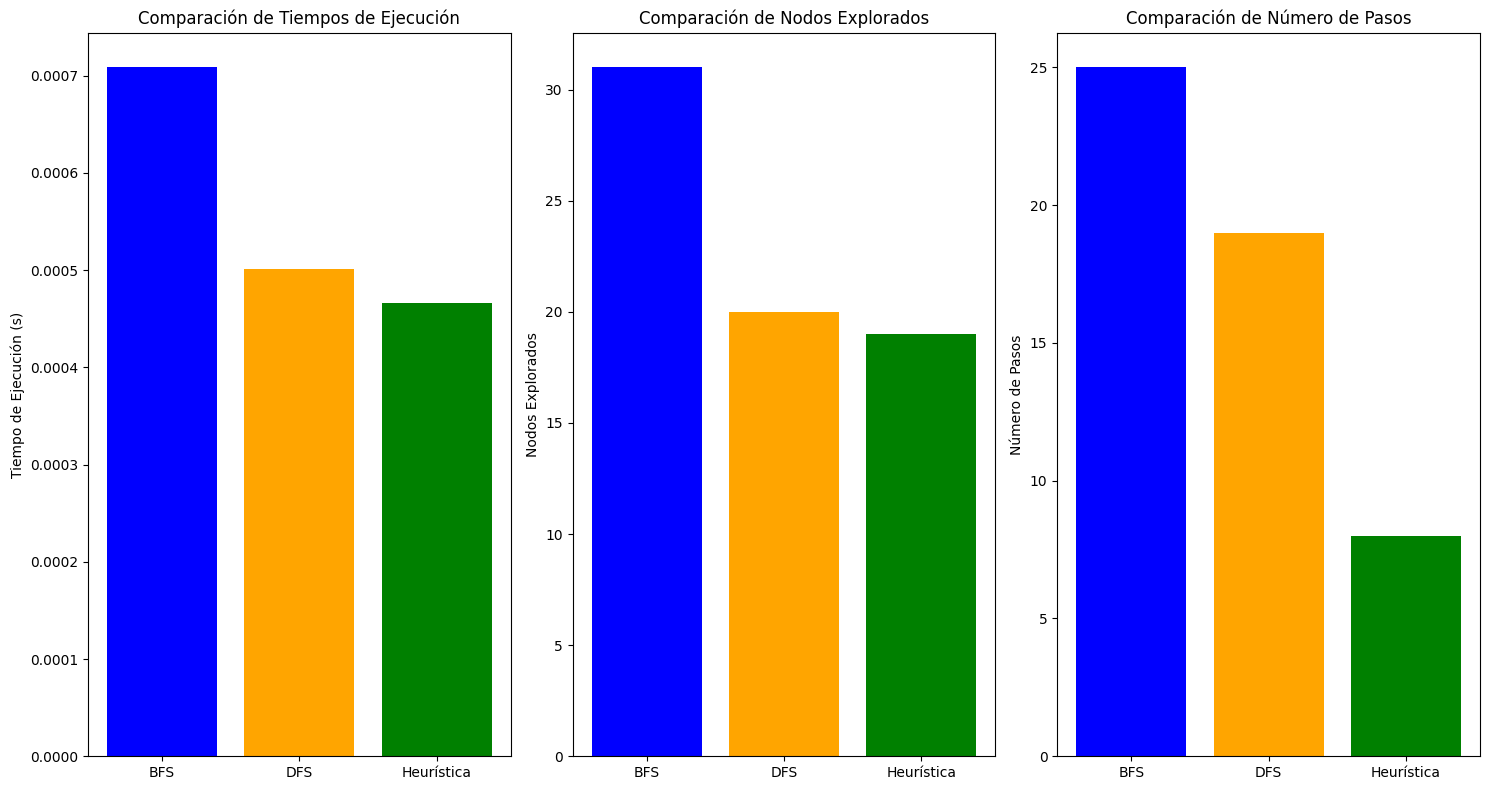

In [2]:
if __name__ == "__main__":
    # Obtener valores del usuario
    configuracion_inicial, configuracion_objetivo, espacio_estados = pedir_valores()

    if configuracion_inicial and configuracion_objetivo:
        # Crear instancia del problema de Hanoi
        hanoi = Hanoi(configuracion_inicial, configuracion_objetivo)

        # Resolver con BFS
        print("\nAlgoritmo BFS:")
        camino_bfs, tiempo_bfs, nodos_bfs = hanoi.bfs(configuracion_inicial, configuracion_objetivo)
        if camino_bfs and (len(camino_bfs) <= espacio_estados):
            print("Camino encontrado:")
            for idx, estado in enumerate(camino_bfs):
                print(f"Paso {idx+1}: {estado}")
            print(f"Tiempo de ejecución: {tiempo_bfs} segundos")
            print(f"Nodos explorados: {nodos_bfs}")
        else:
            print("No se ha encontrado una solución con el tamaño máximo asignado al conjunto de estados")

        # Resolver con DFS
        print("\nAlgoritmo DFS:")
        camino_dfs, tiempo_dfs, nodos_dfs = hanoi.dfs(configuracion_inicial, configuracion_objetivo)
        if camino_dfs and (len(camino_dfs) <= espacio_estados):
            print("Camino encontrado:")
            for idx, estado in enumerate(camino_dfs):
                print(f"Paso {idx+1}: {estado}")
            print(f"Tiempo de ejecución: {tiempo_dfs} segundos")
            print(f"Nodos explorados: {nodos_dfs}")
        else:
            print("No se ha encontrado una solución con el tamaño máximo asignado al conjunto de estados")

        # Resolver con heurística estática
        print("\nAlgoritmo Heurística Estática:")
        camino_heuristica, tiempo_heuristica, nodos_heuristica, configuraciones_heuristica = hanoi.heuristicaEstatica(configuracion_inicial, configuracion_objetivo)
        if camino_heuristica and (len(camino_heuristica) <= espacio_estados):
            print("Camino encontrado:")
            for idx, estado in enumerate(camino_heuristica):
                print(f"Paso {idx+1}: {estado}")
            print(f"Tiempo de ejecución: {tiempo_heuristica} segundos")
            print(f"Nodos explorados: {nodos_heuristica}")
        else:
            print("No se ha encontrado una solución con el tamaño máximo asignado al conjunto de estados")

        # Visualización de resultados

        print("\nGráficas Dinámicas:")
        plt.figure(figsize=(15, 8))

        plt.subplot(1, 3, 1)
        algoritmos = ['BFS', 'DFS', 'Heurística']
        tiempos = [tiempo_bfs, tiempo_dfs, tiempo_heuristica]
        plt.bar(algoritmos, tiempos, color=['blue', 'orange', 'green'])
        plt.ylabel('Tiempo de Ejecución (s)')
        plt.title('Comparación de Tiempos de Ejecución')

        plt.subplot(1, 3, 2)
        nodos_explorados = [nodos_bfs, nodos_dfs, nodos_heuristica]
        plt.bar(algoritmos, nodos_explorados, color=['blue', 'orange', 'green'])
        plt.ylabel('Nodos Explorados')
        plt.title('Comparación de Nodos Explorados')

        plt.subplot(1, 3, 3)
        pasos = [len(camino_bfs), len(camino_dfs), len(camino_heuristica)]
        plt.bar(algoritmos, pasos, color=['blue', 'orange', 'green'])
        plt.ylabel('Número de Pasos')
        plt.title('Comparación de Número de Pasos')

        plt.tight_layout()
        plt.show()

# Gráficas de Estudio: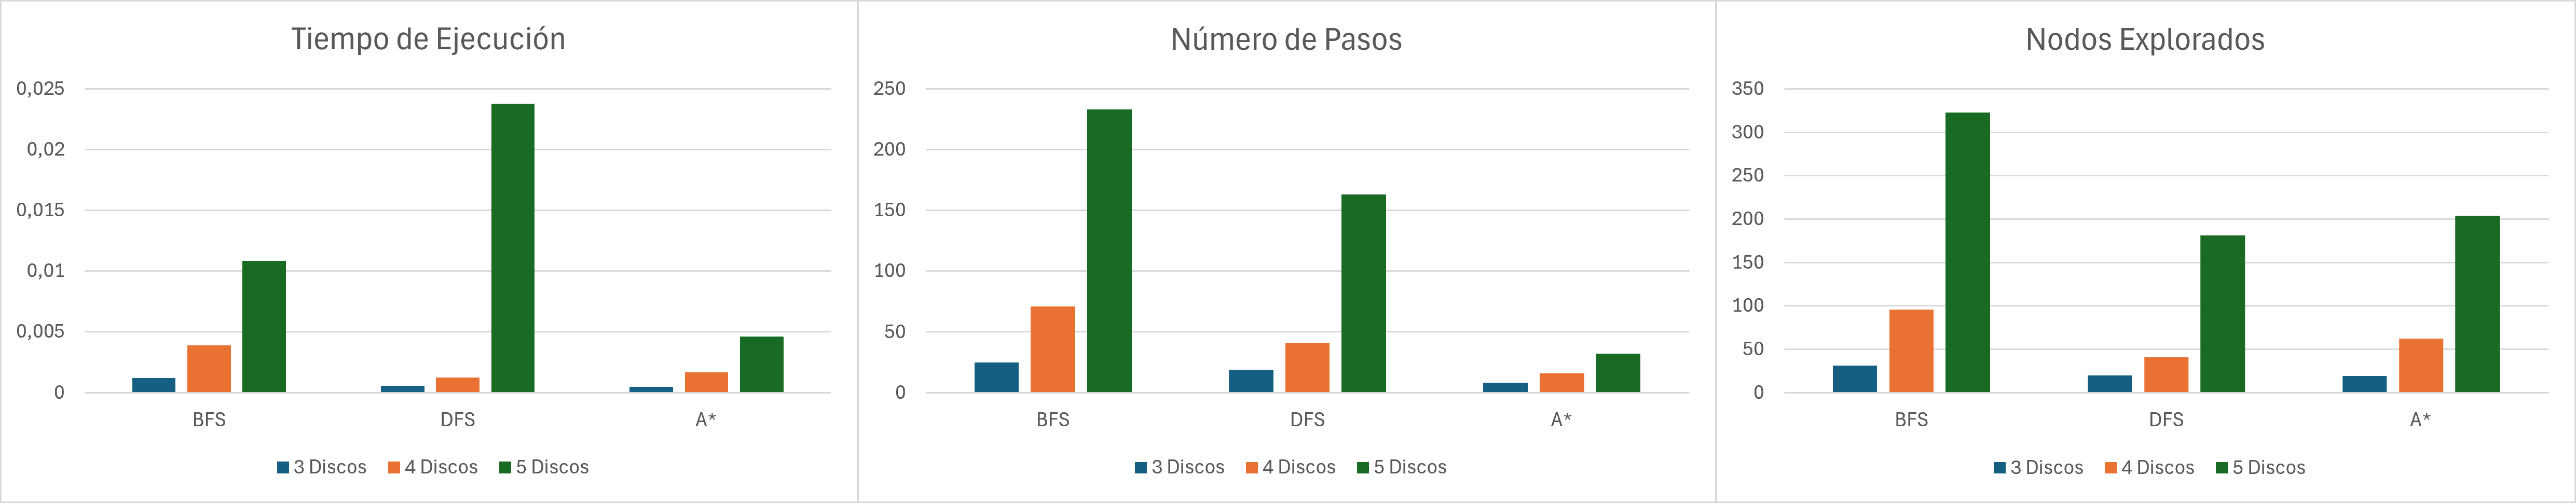

## a) Descripción del problema como una búsqueda en un espacio de estados.  
* **Estado inicial $s_0$:** El estado inicial es elegido por el usuario, aunque típicamente es aquel en el que todos los discos ($D_1, \: D_2 \: , ..., \: D_n$) se encuentran apilados de mayor a menor tamaño en la aguja *A*.

* **Estado meta $s_f$:** El estado meta es aquel en el que todos los discos están apilados en el orden de tamaños (de abajo a arriba) en la aguja *B* o la aguja *C*: $n, \: n-1, \: ..., \: 1$.

* **Operadores:** Mover un disco de una aguja a otra.

* **Restricciones:**
  * Un disco nunca puede reposar encima de otro de menor tamaño (es decir, los discos siempre estarán colocados de la forma $(D_1, \: D_2, \: ..., \: D_n)$).

  * Cuando se proceda a mover un disco de una aguja a otra, solo se podrán mover aquellos que se encuentren en la cima de la aguja (es decir, cada aguja corresponde a una estructura LIFO).

## b) Descripción de los operadores que se pueden aplicar para la función expandir(nodos).
**Descripción**:

1. Seleccionar una torre de origen (de las tres torres disponibles: A, B, C).
2. Seleccionar una torre de destino (distinta de la torre de origen y que cumpla con las reglas del juego, es decir, el disco a mover debe ser más pequeño que el disco en la cima de la torre de destino).
3. Verificar que la torre de origen no esté vacía y que la torre de destino acepte el disco a mover según las reglas del juego.
4. Extraer el disco superior de la torre de origen.
5. Colocar el disco extraído en la cima de la torre de destino.
6. Generar una nueva configuración del juego después de aplicar este movimiento.
7. Agregar la nueva configuración a la lista de nodos expandidos.

## c) Descripción del conjunto de los estados posibles.
El conjunto de estado se define por la disposición de los discos en las tres agujas (A, B y C). Se puede describir de la siguiente manera:

- **Estado inicial**: Todos los discos están apilados en orden decreciente de tamaño en la aguja A, mientras que las agujas B y C están vacías.
- **Estados intermedios**: Durante el proceso de mover los discos de una aguja a otra, se generan múltiples estados intermedios donde los discos se encuentran distribuidos entre las tres agujas, manteniendo siempre la condición de que ningún disco más grande esté sobre uno más pequeño.
- **Estado final**: El estado final se alcanza cuando todos los discos han sido transferidos a la aguja B o C, manteniendo el orden decreciente de tamaño en cada una de ellas.
- **Estados inválidos**: Cualquier estado donde un disco más grande esté sobre uno más pequeño sería un estado inválido.

## d) Algoritmo de Búsqueda en amplitud

In [3]:
from collections import deque

def expandir_bfs(estado):
    vecinos = deque()
    for origen in range(3):
        for destino in range(3):
            if origen != destino and estado[origen] and (
                    not estado[destino] or estado[destino][-1] > estado[origen][-1]):
                nuevo = copy.deepcopy(estado)
                nuevo[destino].append(nuevo[origen].pop())
                vecinos.append(nuevo)
    return vecinos

def hanoi_bfs(e_ini, e_fin):
    t_ini = time.time()
    visitados = []
    q = deque([e_ini])
    nodos_explorados = 0  # Contador de nodos explorados

    while q:
        actual = q.popleft()
        nodos_explorados += 1  # Incrementar el contador de nodos explorados
        if actual not in visitados:
            visitados.append(actual)
            if actual == e_fin:
                t_fin = time.time()
                return visitados, t_fin-t_ini, nodos_explorados
            q.extend(vecino for vecino in expandir_bfs(actual) if vecino not in visitados)

    return [], 0, nodos_explorados

def imprimir_pasos(path):
    for idx, item in enumerate(path):
        print(f"Paso {idx+1}: {item}")


# Configuraciones inicial y objetivo
configuracion_inicial = [[3, 2, 1], [], []]
configuracion_objetivo = [[], [], [3, 2, 1]]

path, t, nodos_explorados = hanoi_bfs(e_ini=configuracion_inicial, e_fin=configuracion_objetivo)

if path:
    imprimir_pasos(path)
    print(f"\nTIEMPO: {t}")
    print(f"Nodos explorados: {nodos_explorados}")

Paso 1: [[3, 2, 1], [], []]
Paso 2: [[3, 2], [1], []]
Paso 3: [[3, 2], [], [1]]
Paso 4: [[3], [1], [2]]
Paso 5: [[3], [2], [1]]
Paso 6: [[3, 1], [], [2]]
Paso 7: [[3], [], [2, 1]]
Paso 8: [[3, 1], [2], []]
Paso 9: [[3], [2, 1], []]
Paso 10: [[], [3], [2, 1]]
Paso 11: [[], [2, 1], [3]]
Paso 12: [[1], [3], [2]]
Paso 13: [[], [3, 1], [2]]
Paso 14: [[1], [2], [3]]
Paso 15: [[], [2], [3, 1]]
Paso 16: [[1], [3, 2], []]
Paso 17: [[2], [3, 1], []]
Paso 18: [[1], [], [3, 2]]
Paso 19: [[2], [], [3, 1]]
Paso 20: [[], [3, 2, 1], []]
Paso 21: [[], [3, 2], [1]]
Paso 22: [[2, 1], [3], []]
Paso 23: [[2], [3], [1]]
Paso 24: [[], [1], [3, 2]]
Paso 25: [[], [], [3, 2, 1]]

TIEMPO: 0.0018947124481201172
Nodos explorados: 31


## e) Algoritmo de Búsqueda en Profundidad.

In [4]:
import time
import copy

def expandir_dfs(estado):
    vecinos = []
    for origen in range(3):
        for destino in range(3):
            if origen != destino and estado[origen] and (
                    not estado[destino] or estado[destino][-1] > estado[origen][-1]):
                nuevo = copy.deepcopy(estado)
                nuevo[destino].append(nuevo[origen].pop())
                vecinos.append(nuevo)
    return vecinos

def hanoi_dfs(e_ini, e_fin):
    t_ini = time.time()
    visitados = []

    stack = [e_ini]
    nodos_explorados = 0  # Contador de nodos explorados

    while stack:
        actual = stack.pop()
        nodos_explorados += 1  # Incrementar el contador de nodos explorados
        if actual not in visitados:
            visitados.append(actual)
            if actual == e_fin:
                t_fin = time.time()
                return visitados, t_fin - t_ini, nodos_explorados
            vecinos = expandir_dfs(actual)
            stack.extend(vecino for vecino in reversed(vecinos) if vecino not in visitados)

    return [], 0, 0


def imprimir_pasos(path):
    for idx, item in enumerate(path):
        print(f"Paso {idx+1}: {item}")

# Configuraciones inicial y objetivo
configuracion_inicial = [[3, 2, 1], [], []]
configuracion_objetivo = [[], [], [3, 2, 1]]

path, t, nodos_explorados = hanoi_dfs(e_ini=configuracion_inicial, e_fin=configuracion_objetivo)

if path:
    imprimir_pasos(path)
    print(f"\nTIEMPO: {t}")
    print(f"Nodos explorados: {nodos_explorados}")

Paso 1: [[3, 2, 1], [], []]
Paso 2: [[3, 2], [1], []]
Paso 3: [[3], [1], [2]]
Paso 4: [[3, 1], [], [2]]
Paso 5: [[3], [], [2, 1]]
Paso 6: [[], [3], [2, 1]]
Paso 7: [[1], [3], [2]]
Paso 8: [[], [3, 1], [2]]
Paso 9: [[2], [3, 1], []]
Paso 10: [[2, 1], [3], []]
Paso 11: [[2], [3], [1]]
Paso 12: [[], [3, 2], [1]]
Paso 13: [[1], [3, 2], []]
Paso 14: [[], [3, 2, 1], []]
Paso 15: [[2, 1], [], [3]]
Paso 16: [[2], [1], [3]]
Paso 17: [[], [1], [3, 2]]
Paso 18: [[1], [], [3, 2]]
Paso 19: [[], [], [3, 2, 1]]

TIEMPO: 0.0008416175842285156
Nodos explorados: 20


## f) Proponer y describir una heurística.
**Distancia de Hamming**: contar los discos que se encuentran en diferentes posiciones entre la configuración inicial y la final e incrementar en uno el coste por cada disco que se encuentre en una posición diferente entre ambas configuraciones.

**Descripción**:

1. Calcular la distancia de Hamming entre la configuración actual y la configuración final del problema.
2. Cuantos más discos estén en diferentes posiciones, mayor será la distancia de Hamming y mayor será la estimación de la cantidad de movimientos necesarios.
3. La heurística elegirá la configuración de expansión que minimice la distancia de Hamming, es decir, que más se acerque a la configuración objetivo.

## g) Programa en Python de la búsqueda de la solución usando el algoritmo de A* con la heurística propuesta.

In [5]:
def calcular_distancia_hamming(configuracion_actual, configuracion_objetivo):
    distancia_hamming = 0
    for torre_actual, torre_objetivo in zip(configuracion_actual, configuracion_objetivo):
        for disco_actual, disco_objetivo in zip(torre_actual, torre_objetivo):
            if disco_actual != disco_objetivo:
                distancia_hamming += 1
    return distancia_hamming

def esFinal(configuracion, configuracion_objetivo):
    return configuracion == configuracion_objetivo

def expandir(configuracion, configuracion_objetivo):
    sucesores = []
    for i in range(3):
        for j in range(3):
            if i != j and (configuracion[i] and (not configuracion[j] or configuracion[i][-1] < configuracion[j][-1])):
                nuevo_estado = [list(torre) for torre in configuracion]
                if nuevo_estado[i]:  # Verificar si la lista no está vacía antes de llamar a pop()
                    nuevo_estado[j].append(nuevo_estado[i].pop())
                    sucesores.append((nuevo_estado, calcular_distancia_hamming(nuevo_estado, configuracion_objetivo)))
    return sucesores

def imprimir_pasos(configuraciones):
    for i, configuracion in enumerate(configuraciones):
        print(f"Paso {i + 1}: {configuracion}")

def heuristicaEstatica(configuracion_inicial, configuracion_objetivo):
    t_ini = time.time()
    frontera = PriorityQueue()
    frontera.put((0, configuracion_inicial))
    padres = {tuple(map(tuple, configuracion_inicial)): None}
    costo_camino = {tuple(map(tuple, configuracion_inicial)): 0}
    contador = 0
    configuraciones = []

    while not frontera.empty():
        _, estado_actual = frontera.get()
        contador += 1  # Incrementar el contador de nodos explorados
        configuraciones.append(estado_actual)

        if esFinal(estado_actual, configuracion_objetivo):
            camino = []
            while estado_actual:
                camino.append(estado_actual)
                estado_actual = padres[tuple(map(tuple, estado_actual))]
            t_fin = time.time()
            return camino[::-1], t_fin-t_ini, contador, configuraciones  # Devolver también el contador de nodos explorados y las configuraciones visitadas

        for sucesor, distancia in expandir(estado_actual, configuracion_objetivo):
            nuevo_costo = costo_camino[tuple(map(tuple, estado_actual))] + 1
            if tuple(map(tuple, sucesor)) not in costo_camino or nuevo_costo < costo_camino[tuple(map(tuple, sucesor))]:
                costo_camino[tuple(map(tuple, sucesor))] = nuevo_costo
                prioridad = nuevo_costo + distancia
                frontera.put((prioridad, sucesor))
                padres[tuple(map(tuple, sucesor))] = estado_actual

# Ejemplo de uso:
configuracion_inicial = [[3, 2, 1], [], []]
configuracion_objetivo = [[], [], [3, 2, 1]]
camino, tiempo, nodos_explorados, configuraciones = heuristicaEstatica(configuracion_inicial, configuracion_objetivo)
imprimir_pasos(configuraciones)
print("Tiempo de ejecución:", tiempo)
print("Nodos explorados:", nodos_explorados)

Paso 1: [[3, 2, 1], [], []]
Paso 2: [[3, 2], [1], []]
Paso 3: [[3, 2], [], [1]]
Paso 4: [[3], [1], [2]]
Paso 5: [[3], [2], [1]]
Paso 6: [[3], [2, 1], []]
Paso 7: [[3, 1], [2], []]
Paso 8: [[], [2, 1], [3]]
Paso 9: [[3, 1], [], [2]]
Paso 10: [[1], [2], [3]]
Paso 11: [[3], [], [2, 1]]
Paso 12: [[], [2], [3, 1]]
Paso 13: [[], [3], [2, 1]]
Paso 14: [[], [3, 1], [2]]
Paso 15: [[1], [], [3, 2]]
Paso 16: [[1], [3], [2]]
Paso 17: [[1], [3, 2], []]
Paso 18: [[2], [3, 1], []]
Paso 19: [[], [], [3, 2, 1]]
Tiempo de ejecución: 0.0007252693176269531
Nodos explorados: 19
